# Introducción a GeoPandas

En esta parte de este tutorial, aprenderemos los aspectos básicos de la carga y el procesamiento de datos geográficos utilizando Geopandas. Geopandas está construido sobre las librerias Pandas y las librerias Numpy de python. Al igual que Pandas cuadro de datos  (Dataframe en ingles), la estructura de datos de Geopandas contiene  cuadros de Geodatos (GeodataFrame en ingles) y GeoSeries. Geopandas no solo proporciona la capacidad de leer y manipular datos geográficos fácilmente, sino que también puede realizar muchas operaciones geoespaciales esenciales, incluidas, entre otras, operaciones geométricas y proyecciones que toma de la libreria Shapely.

Puede visualizar y trazar mapas con Geopandas (proporciona una interfaz de alto nivel para la libreria de Matplotlib) utilizando el método plot() en el cuadro de los geodatos/geoseries (GeodataFrame / GeoSeries). En la primera sección, aprenderemos sobre datos geográficos, coordenadas geográficas y como cargar y escribir  los datos geográficos.

## Instalemos primero algunas librerias
1. conda install -c conda-forge gdal
2. conda install --channel conda-forge geopandas
3. pip install plotly_express

## Objetivos de aprendizaje:
1. Leer y escribir datos geográficos en geopandas.
2. Lear archivos csv y convértirlos en Geopandas Cuadros de Geodatos (GeodataFrame).
3. Proyectar y establecer sistemas de referencia de coordenadas (CRS).

## 1. Reading Geographic data
Geographic data (Vector) comes in different formats (Shapefiles, Geopackage, Geojson ...etc). Loading most of Geodata Formats with Geopandas is straightforward. We can use: 
```
read_file(path/to/file)

```

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px


## Necesitamos conseguir el conjunto de datos 
correr el commando git clone --recursive https://github.com/shakasom/GDS.git de la consola de comandos git bash o de algun programa donde se pueda clonar repositorios de github

### Veamos lo que tenemos dentro de la carpeta GDS
cd GDS/dataset/
1-introData.zip

## Leer los datos

### 1. Leer países -> Formato de Geopackage

In [18]:
import os

In [19]:
print(os.getcwd())

C:\Users\Michelle Christmas\Desktop\Python Programming Course\GDS\dataset\1-introData


In [20]:
os.chdir('C:\\Users\Michelle Christmas\\Desktop\Python Programming Course\\GDS\dataset\\1-introData\\1-introData')

In [21]:
#C:\Users\Michelle Christmas\Desktop\Python Programming Course\GDS\dataset\1-introData\countries.gpkg
#archivo = 
países = gpd.read_file('countries.gpkg')

In [22]:
países.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,(POLYGON ((117.7036079039552 4.163414542001791...
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,(POLYGON ((117.7036079039552 4.163414542001791...
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...


In [23]:
# Filas y columnas de datos de los países.
países.shape

(253, 11)

In [ ]:
# Estadística descriptiva de los datos de los países.
#cuenta
#media
#deviasion estandar
#minimo
#cuantiles
#maximo

In [24]:
# Estadística descriptiva de los datos de los países.
países.describe()

,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR
count,2.530000e+02,253.000000,2.530000e+02,253.000000,253.000000,253.000000
mean,2.927074e+07,11.462451,4.712708e+05,2000.794466,1639.592885,1991.490119
std,1.234639e+08,3.958562,1.936975e+06,178.959064,799.327438,218.598342
min,0.000000e+00,1.000000,0.000000e+00,0.000000,-99.000000,0.000000
25%,1.151200e+05,9.000000,2.851000e+03,2017.000000,2000.000000,2016.000000
50%,4.510327e+06,12.000000,3.299000e+04,2017.000000,2006.000000,2016.000000
75%,1.788524e+07,14.000000,1.890000e+05,2017.000000,2010.000000,2016.000000
max,1.379303e+09,18.000000,2.114000e+07,2017.000000,2012.000000,2016.000000


read_file (ruta / a / archivo) -> lee datos geográficos y devuelve un cuadro de GeoDatos (GeodataFrame)

El método .head () devuelve las primeras 5 filas. Puede ajustar el número de filas para volver si desea, por ejemplo, .head (8)

.shape () devuelve el número de filas y columnas de los datos

In [ ]:
haremos lo mismo con los siguientes archivos, pero estan en diferentes formatos Geojson, 

In [26]:
# 2. Leer los datos de ciudades en el formato de Geojson --> Geojson Format
ciudades = gpd.read_file('cities.geojson')

In [27]:
# Explorar los datos de las ciudades
ciudades.head()

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
0,Colonia del Sacramento,0.0,0,-34.479999,-57.840002,21714,21714,0,POINT (-57.84000247340134 -34.47999900541754)
1,Trinidad,0.0,0,-33.543999,-56.900997,21093,21093,0,POINT (-56.90099656015872 -33.5439989373607)
2,Fray Bentos,0.0,0,-33.138999,-58.303997,23279,23279,0,POINT (-58.3039974719095 -33.1389990288435)
3,Canelones,0.0,0,-34.538004,-56.284001,19698,19698,0,POINT (-56.28400149324307 -34.53800400667546)
4,Florida,0.0,0,-34.099002,-56.214998,32234,32234,0,POINT (-56.21499844799416 -34.09900200521719)


In [28]:
ciudades.shape

(7343, 9)

In [29]:
ciudades.describe()

,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other
count,7343.000000,7343.000000,7343.000000,7343.000000,7.343000e+03,7.343000e+03,7.343000e+03
mean,0.009533,0.080349,20.496166,10.987582,3.218734e+05,2.078131e+05,4.137240e+05
std,0.097177,0.271851,29.263073,79.435193,1.066623e+06,6.414873e+05,1.258383e+06
min,0.000000,0.000000,-89.982894,-179.589979,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,0.000000,0.000000,-0.674573,-64.781974,1.947850e+04,1.337000e+04,0.000000e+00
50%,0.000000,0.000000,26.640298,18.699985,6.945100e+04,5.003200e+04,3.981700e+04
75%,0.000000,0.000000,43.532008,73.292415,2.297540e+05,1.634720e+05,2.230085e+05
max,1.000000,1.000000,82.483323,179.383304,3.567600e+07,1.460851e+07,2.145995e+07


Por lo general, necesitamos trazar nuestros datos como un mapa. Geopandas está construido sobre Matplotlib y Descartes para visualizar mapas fácilmente. Podemos usar este método para trazar un mapa fácilmente
GeodataFrame.plot()

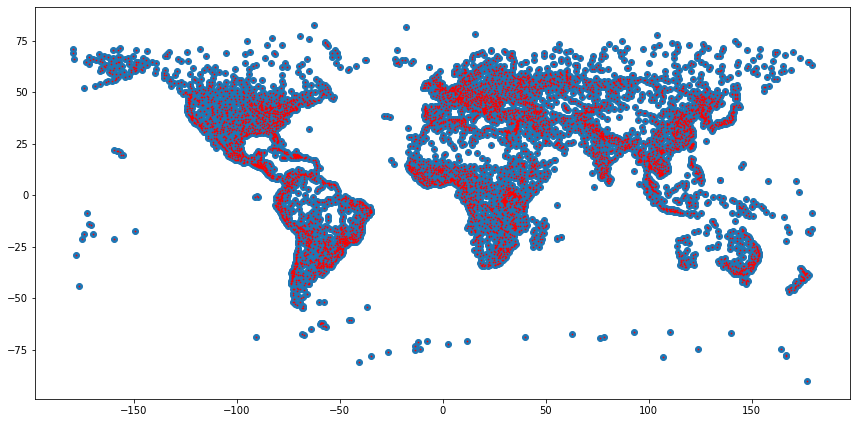

In [30]:
# Plot overlayed maps
fig, ax = plt.subplots(figsize=(12,12))
ciudades.plot(ax=ax)
ciudades.plot(markersize=0.5, color='red',ax=ax)
plt.tight_layout()
plt.savefig('overlay_map.png')
plt.show()

Ejercicio 1.1: Leer los datos de los ríos.
Ejercicio 1.2: Leer las primeras 5 filas del conjunto de datos de los ríos
Ejercicio 1.3: Visualizar conjunto de datos de ríos.

## 2. Sistemas de coordenadas y proyecciones.
Los sistemas de referencia de coordenadas representan cómo nuestros datos como los bidimensionales (planos) se relacionan con los lugares reales en la tierra. Es la pega que mantiene los atributos en sus respectivas ubicaciones. Los cuadros de Geodata (Geodataframes) tiene el atributo .crs que puede proporcionarle el CRS original utilizado en los datos. Es fácil transformar y proyectar estas coordenadas. Sin embargo, para realizar proyecciones, es necesario tener el mismo de sistema de coordenadas (CRS) para poder realizar un análisis geográfico y obtener los valores correctos del análisis. Los países, las ciudades y los ríos tienen el mismo sistema de coordenadas (CRS). Vamos a revisarlos.

In [31]:
# Dato
países.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,(POLYGON ((117.7036079039552 4.163414542001791...
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,(POLYGON ((117.7036079039552 4.163414542001791...
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...


In [32]:
# Sistemas de coordenadas (CRS)
países.crs == ciudades.crs

True

el sistema de coordenadas el resultado es cierto o verdadero porque son iguales (True significa cierto en ingles)

In [33]:
países.crs

{'init': 'epsg:4326'}

Diferentes sistemas de proyeccion de coordenadas (CRS) tienen diferentes medidas. Para algunos, las coordenadas se definen en grados decimales, mientras que otros se definen en metros. Es un proceso común reproyectar datos de un formato a otro en el procesamiento de datos geográficos. Esta fuente es muy útil para visualizar y comparar diferentes proyecciones.  https://map-projections.net/compare.php?p1=mercator-84&p2=robinson&sps=1, disculpen pero la pagina esta en ingles pero es facil de utilizar para encotrar diferentes proyecciondes de coordenadas

Proyectaremos nuestros datos en mercator. La proyección de Mercator, los cuadrángulos de latitud-longitud se extienden a lo largo del eje x y el eje y al alejarse del ecuador.

In [34]:
# Look at the geometry column: decimal degrees
países.geometry[:5]

0    (POLYGON ((117.7036079039552 4.163414542001791...
1    (POLYGON ((117.7036079039552 4.163414542001791...
2    (POLYGON ((-69.51008875199994 -17.506588197999...
3    (POLYGON ((-69.51008875199994 -17.506588197999...
4    (POLYGON ((-69.51008875199994 -17.506588197999...
Name: geometry, dtype: object

In [35]:
# Proyectar los datos en Mercator Projection epsg = 3395
paises_proyectados = países.to_crs({'init': 'epsg:3395'})

# Ver la columna de geometría de los países proyectados.
paises_proyectados['geometry'][:5]

0    (POLYGON ((13102705.69639943 460777.6522179524...
1    (POLYGON ((13102705.69639943 460777.6522179524...
2    (POLYGON ((-7737827.684867887 -1967028.7849201...
3    (POLYGON ((-7737827.684867887 -1967028.7849201...
4    (POLYGON ((-7737827.684867887 -1967028.7849201...
Name: geometry, dtype: object

Debido a la proyección, la geometría ya no está en estilo lat / lon. Es más fácil entender la diferencia en los mapas. Vamos a trazar los países originales y los países proyectados.

In [36]:
# Vamos a trazar los países no proyectados y proyectados

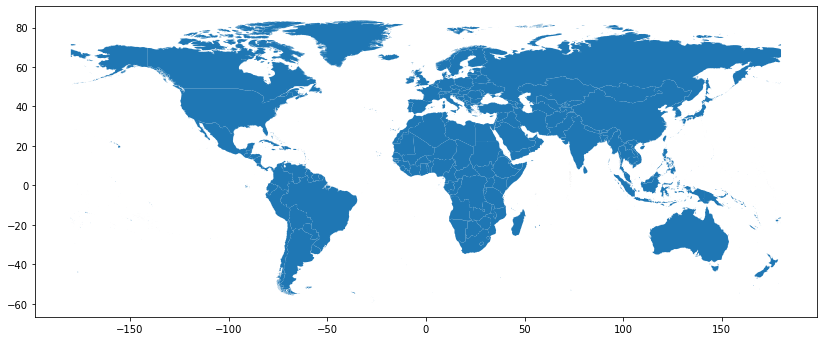

In [37]:
países.plot(figsize=(14,12));
plt.savefig("wgs84.png")

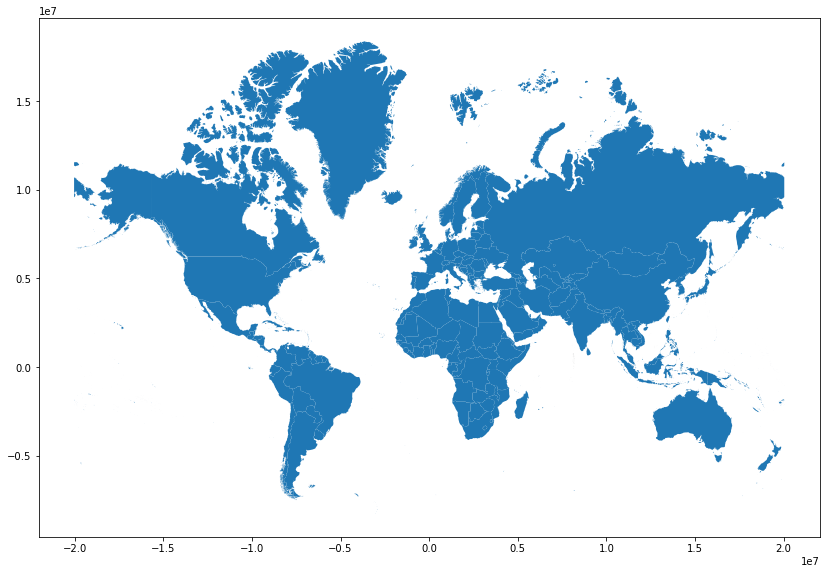

In [38]:
paises_proyectados.plot(figsize=(14,12));
plt.savefig("mercator.png")

Observe las diferentes escalas de x e y en ambos mapas. Si intenta superponer los datos proyectados con los datos no proyectados, entonces los datos no se alinearán correctamente. Veamos si podemos trazar ciudades en la parte superior de los países proyectados. Recuerda que no hemos proyectado las ciudades.

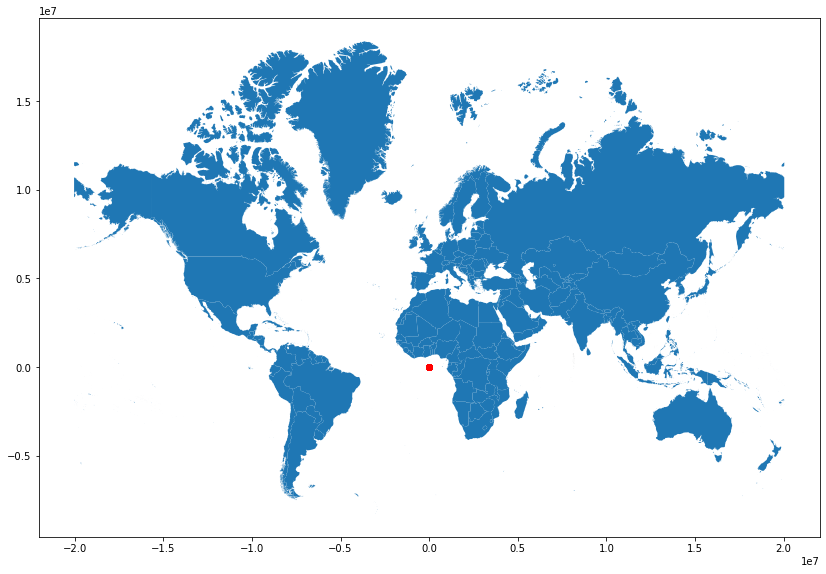

In [39]:
fig, ax = plt.subplots(figsize=(14,12))
paises_proyectados.plot(ax=ax)
# Cities are still in WGS84
ciudades.plot(ax=ax, color='red'); 
plt.savefig('overlay_unproj.png')

Ejercicio 2.1: Convertir los datos de las ciudades en EPSG: 3395 y trazar ciudades en la parte superior de los países_proyectados

## 3. Escribir los datos geográficos
Podemos guardar fácilmente todos los datos nuevos creados en nuestro disco local. Esto es útil cuando desea acceder a ese archivo en otro momento sin volver a realizar las mismas operaciones. Guardemos nuestros países proyectados en nuestro espacio en disco. Recuerda que lo hemos proyectado. Entonces, en caso de que lo necesitemos en otro momento, salvémoslo.

Geopandas tiene:
to_file(path/to/file + extension)

In [40]:
# Datos
paises_proyectados.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,(POLYGON ((13102705.69639943 460777.6522179524...
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,(POLYGON ((13102705.69639943 460777.6522179524...
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-7737827.684867887 -1967028.7849201...
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,(POLYGON ((-7737827.684867887 -1967028.7849201...
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-7737827.684867887 -1967028.7849201...


In [41]:
#CRS
paises_proyectados.crs

{'init': 'epsg:3395'}

In [ ]:
# Guardar los países proyectados
shp = '1-introData/countries_epsg3395.shp'
paises_proyectados.to_file(shp)

Ejercicio 3.1: Guarde el archivo de ciudades proyectadas que creó en el ejercicio 2.1 en un archivo


# El Fin
referencia traducido del ingles al castellano del repositorio de shakasom en github